# Libraries to be Imported

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directory Paths

In [2]:
pth=r"C:\Users\Abhinaav Ramesh\Desktop\Image\\"
tg1=r"C:\Users\Abhinaav Ramesh\Desktop\PAP_Data\Label\\"
tg2=r"C:\Users\Abhinaav Ramesh\Desktop\PAP_Data\Image\\"

# Normalize Color from original PAP Smear Databse to three class and resave as png

In [ ]:
files=os.listdir(pth)
for i in files:
    tempfiles=os.listdir(pth+i+"\\")
    for x in tempfiles:
        if x[-6:]=="-d.bmp":
            img=cv2.imread(pth+i+"\\"+x)
            red=img[:,:,2]
            green=img[:,:,1]
            blue=img[:,:,0]
            (r,c)=np.shape(red)
            for l in range(r):
                for m in range(c):
                    temp=[red[l,m],green[l,m],blue[l,m]]
                    if temp==[0,0,255]:
                        red[l,m]=255
                        blue[l,m]=0
                        green[l,m]=0
                    if temp==[128,128,128] or temp==[0,0,128]:
                        red[l,m]=0
                        blue[l,m]=0
                        green[l,m]=255
                    if temp==[255,0,0]:
                        red[l,m]=0
                        blue[l,m]=0
                        green[l,m]=0
            cv2.imwrite(tg1+"\\"+x[:-6]+".png",img)
        else:
            img=cv2.imread(pth+i+"\\"+x)
            cv2.imwrite(tg2+"\\"+x[:-4]+".png",img)

[array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   

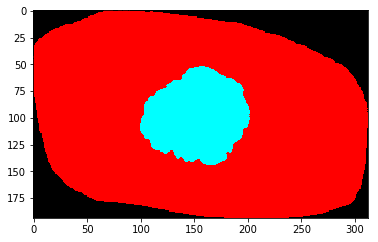

In [13]:
a=cv2.imread(tg1+"148494967-148494986-001.png")
plt.imshow(a)
als=list(a)
als1=list(als[0])
print(als)

Making Image to Aspect Ratio 1 - Target(Class Images)

In [3]:
files=os.listdir(tg1)
for i in files:
    
    img=cv2.imread(tg1+i)
    red=img[:,:,0]
    green=img[:,:,1]
    blue=img[:,:,2]
    (r,c)=np.shape(red)
    for l in range(r):
        for m in range(c):
            temp=[red[l,m],green[l,m],blue[l,m]]
            if temp==[0,255,255]:
                red[l,m]=0
                blue[l,m]=255
                green[l,m]=0
    
    width,length=img.shape[0:2]
    if width>length:
        ldiff=width-length
        img_padded=cv2.copyMakeBorder(img,0,0,int(ldiff/2),ldiff-int(ldiff/2),cv2.BORDER_CONSTANT,value=[0,0,0])
        
    elif length>width:
        ldiff=length-width
        img_padded=cv2.copyMakeBorder(img,int(ldiff/2),ldiff-int(ldiff/2),0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
    cv2.imwrite(tg1+i,img_padded)



Making Image to Aspect Ratio 1 - Original Images

In [4]:
files=os.listdir(tg2)
for i in files:
    img=cv2.imread(tg2+i)
    
    width,length=img.shape[0:2]
    if width>length:
        ldiff=width-length
        img_padded=cv2.copyMakeBorder(img,0,0,int(ldiff/2),ldiff-int(ldiff/2),cv2.BORDER_CONSTANT,value=[0,0,0])
        
    elif length>width:
        ldiff=length-width
        img_padded=cv2.copyMakeBorder(img,int(ldiff/2),ldiff-int(ldiff/2),0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
        
    cv2.imwrite(tg2+i,img_padded)

Resizing all Images to 128*128

In [16]:
files=os.listdir(tg1)
for i in files:
    img=cv2.imread(tg1+i)
    img1 = cv2.resize(img, (128,128) , interpolation = cv2.INTER_AREA) 
    cv2.imwrite(tg1+i,img1)


In [17]:
files=os.listdir(tg2)
for i in files:
    img=cv2.imread(tg2+i)
    img1 = cv2.resize(img, (128,128) , interpolation = cv2.INTER_AREA) 
    cv2.imwrite(tg2+i,img1)

Data Increase by data augmentation - Target Images (Class)

In [18]:
def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

folder_path=tg1
batch_path=tg1
li=os.listdir(folder_path)
for i in li:
    if i[-4:]==".png" or i[-4:]==".jpg" :
        count=0
        img=cv2.imread(folder_path+i)
        count+=1
        img1=cv2.flip(img,1)
        cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',img1)
        count+=1
        img2=cv2.flip(img,0)
        cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',img2)
# Uncomment for Also Augmenting Data Across Rotational Transformations
#         count+=1
#         rot_angles=[30,60,90,120,150,180,210,240,270,300,330]
#         for ang in rot_angles:
#             cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',rotateImage(img,ang))
#             count+=1
#             cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',rotateImage(img1,ang))
#             count+=1
#             cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',rotateImage(img2,ang))
#             count+=1

Data Increase by Data Augmentation - Original Images

In [ ]:
def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

folder_path=tg2
batch_path=tg2
li=os.listdir(folder_path)
for i in li:
    if i[-4:]==".png" or i[-4:]==".jpg" :
        count=0
        img=cv2.imread(folder_path+i)
        count+=1
        img1=cv2.flip(img,1)
        cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',img1)
        count+=1
        img2=cv2.flip(img,0)
        cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',img2)
# Uncomment for Also Augmenting Data Across Rotational Transfor
#         count+=1
#         rot_angles=[30,60,90,120,150,180,210,240,270,300,330]
#         for ang in rot_angles:
#             cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',rotateImage(img,ang))
#             count+=1
#             cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',rotateImage(img1,ang))
#             count+=1
#             cv2.imwrite(batch_path+i[:-4]+'_'+str(count)+'.png',rotateImage(img2,ang))
#             count+=1

Pixel Value Normalizer -exact to three colors -nucleus, cytoplasm, background

In [20]:
list1=[]    
path=tg1
for filename in os.listdir(path):
    img = os.path.join(path+"\\",filename)
    list1.append(img)
print(len(list1))
for im in list1:
    img=cv2.imread(im)
    red=img[:,:,2]
    green=img[:,:,1]
    blue=img[:,:,0]
    (r,c)=np.shape(red)
    for i in range(r):
        for j in range(c):
            if(red[i,j]>150) :
                    red[i,j]=255
                    blue[i,j]=0
                    green[i,j]=0
            elif (blue[i,j]>150):
                    red[i,j]=0
                    blue[i,j]=255
                    green[i,j]=0
            else:
                    red[i,j]=0
                    blue[i,j]=0
                    green[i,j]=0
                

            
    cv2.imwrite(im[:-4]+'.png',img)


2739


# Train Validate Splitter

In [ ]:
import random
import os
import shutil
path1=r'S:\Semantic_PAP\PAP\val_labels\\'
path2=r'S:\Semantic_PAP\PAP\train_labels\\'
ls=os.listdir(path1)
num_to_select = 466                           # No of Validation Samples
ls1 = random.sample(ls, num_to_select)
for i in ls1:
    shutil.move(path1+i,path2)